In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [36]:
#basic_stats
folder = "../dataset/"
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

#customer_zipcodes
folder = "../dataset/"
names=['zipcode','date','category','zipcodecustomer','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
customer_zipcodes = pd.io.parsers.read_table(folder + 'customer_zipcodes000',sep='\t', names=names, parse_dates=["date"])

#payment_distribution 
folder = "../dataset/"
names=['zipcode','date','category','paymentinterval','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
payment_distribution = pd.io.parsers.read_table(folder + 'payment_distribution000',sep='\t', names=names, parse_dates=["date"])

#demographic distribution
folder = "../dataset/"
names=['zipcode','date','category','ageinterval','gender','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
demographic_distribution = pd.io.parsers.read_table(folder + 'demographic_distribution000',sep='\t', names=names, parse_dates=["date"])

#expenditure-time_curve
folder = "../dataset/"
names=['zipcode','date','day_of_week','hour','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
expenditure_time_curve = pd.io.parsers.read_table(folder + 'expenditure-time_curve000',sep='\t', names=names, parse_dates=["date"])


basic_stats["amount"] = basic_stats["payment"]* basic_stats["avg"]
basic_stats["avgpaybymerch"] = basic_stats["payment"]/ basic_stats["merchant"]
basic_stats["amountbymerch"] = basic_stats["amount"]/ basic_stats["merchant"]
basic_stats["avgReppays"] = basic_stats["payment"] / basic_stats["card"]
basic_stats["weekday"] = basic_stats["date"].map(lambda d: (d.weekday()))
basic_stats["day"] = basic_stats["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))

customer_zipcodes["amount"] = customer_zipcodes["payment"]* customer_zipcodes["avg"]
customer_zipcodes["avgpaybymerch"] = customer_zipcodes["payment"]/ customer_zipcodes["merchant"]
customer_zipcodes["amountbymerch"] = customer_zipcodes["amount"]/ customer_zipcodes["merchant"]
customer_zipcodes["avgReppays"] = customer_zipcodes["payment"] / customer_zipcodes["card"]
customer_zipcodes["weekday"] = customer_zipcodes["date"].map(lambda d: (d.weekday()))
customer_zipcodes["day"] = customer_zipcodes["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))

payment_distribution["amount"] = payment_distribution["payment"]* payment_distribution["avg"]
demographic_distribution["amount"] = demographic_distribution["payment"]* demographic_distribution["avg"]
expenditure_time_curve["amount"] = expenditure_time_curve["payment"]* expenditure_time_curve["avg"]


In [ ]:
#basic_stats["density"]=Distribución normal (mean=avg, standarddeviation=std, cortadas( min , max)
# np.random.normal(mu, sigma, 1000)
#https://oneau.wordpress.com/2011/02/28/simple-statistics-with-scipy/

In [40]:
customer_zipcodes["amount"].sum()

132976729.3

In [15]:
customer_zipcodesbycp=pd.pivot_table(customer_zipcodes, values='amount', index=['zipcodecustomer'], aggfunc=np.sum)
customer_zipcodesbycategory=pd.pivot_table(customer_zipcodes, values='amount', index=['category'], aggfunc=np.sum)

In [34]:
customer_zipcodes_know=customer_zipcodes[customer_zipcodes["zipcodecustomer"]!='unknown']
customer_zipcodes_unknown=customer_zipcodes[customer_zipcodes["zipcodecustomer"]=='unknown']
customer_zipcodes_08002=customer_zipcodes[customer_zipcodes["zipcodecustomer"]=='08002']
customer_zipcodes_to_08002=customer_zipcodes[customer_zipcodes["zipcode"]==8002]

In [38]:
customer_zipcodes_knowbycp=pd.pivot_table(customer_zipcodes_know, values='amount', index=['zipcodecustomer'], aggfunc=np.sum)
print customer_zipcodes_know["amount"].sum()
print customer_zipcodes_unknown["amount"].sum()
print customer_zipcodes_know["amount"].sum()+customer_zipcodes_unknown["amount"].sum()
print customer_zipcodes["amount"].sum()

27152729.1
105824000.2
132976729.3
132976729.3


In [54]:
zips_to_08002=pd.pivot_table(customer_zipcodes_to_08002, values='amount', index=['zipcodecustomer'], aggfunc=np.sum)
zip_to_zips=pd.pivot_table(customer_zipcodes_08002, values='amount', index=['zipcode'], aggfunc=np.sum)

In [56]:
print zips_to_08002
zip_to_zips

zipcodecustomer
00000         4169.20
08001         8665.11
08002        18140.79
08003        18413.67
08004        10191.93
08005        10623.28
08006         1581.56
08009          989.50
08010         2141.64
08011         3059.46
08012         3863.40
08013        11627.84
08014         5508.77
08015        11568.97
08016         1674.99
08017          584.97
08018         5254.30
08019         1595.38
08020         2656.62
08021         1130.54
08022          892.73
08023         1991.30
08024         8833.97
08025         9107.66
08026         6815.85
08027         7283.11
08028         7497.98
08029         4122.54
08030         4502.36
08031         3273.84
              ...    
08530          376.32
08570          267.30
08640          292.62
08720          449.33
08740          724.54
08750          588.92
08754          100.85
08760          215.22
08800         1123.95
08820         2221.00
08830         3031.44
08840          359.52
08860          434.20
08901          8

zipcode
8001      278.90
8002    18140.79
8003      974.79
Name: amount, dtype: float64

In [66]:
import pip
def install(package):
   pip.main(['install', package])
install('pandasql') 
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

You are using pip version 7.0.1, however version 7.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [102]:
zipcode=''

queryfrom="""

SELECT category,zipcodecustomer,sum(amount) total
FROM customer_zipcodes 
where zipcode=8172
group by category,zipcodecustomer 
order by sum(amount) desc,zipcodecustomer ,category

"""

queryto="""
SELECT category,zipcode,sum(amount) 
FROM customer_zipcodes 
where zipcodecustomer='08172' 
group by category ,zipcode
order by sum(amount) desc,zipcode, category 
"""

print pysqldf(queryfrom)
print pysqldf(queryto)

                 category zipcodecustomer      total
0              es_fashion         unknown  318336.85
1   es_barsandrestaurants         unknown  131551.63
2    es_wellnessandbeauty         unknown  117427.65
3                 es_home         unknown  105301.65
4               es_health         unknown   90316.94
5                 es_food         unknown   83192.10
6        es_otherservices         unknown   80896.23
7                 es_auto         unknown   73140.68
8                 es_food           08172   59402.83
9                 es_food           08173   34879.82
10             es_fashion           08172   34354.10
11             es_fashion           08173   29807.60
12              es_health           08172   17715.04
13  es_barsandrestaurants           08172   16166.31
14  es_barsandrestaurants           08173   14078.98
15   es_wellnessandbeauty           08172   13573.86
16             es_fashion           08195   13494.67
17   es_wellnessandbeauty           08173   10

In [47]:
#query from app will have:
#  time/date -> hour/day of week
#  category
#  Age
#  gender
#  amount ?? depends on number of persons (how many will you be?)
#  location -> x,y 
#  weather

query="""

SELECT *
FROM payment_distribution 
where paymentinterval  = '20-29.99' and category='es_food'
order by amount desc
LIMIT 10

"""
print pysqldf(query)


   zipcode                 date category paymentinterval  merchant  card  \
0     8500  2014-07-04 00:00:00  es_food        20-29.99        41   171   
1     8500  2014-07-26 00:00:00  es_food        20-29.99        36   159   
2     8225  2014-07-04 00:00:00  es_food        20-29.99        22   153   
3     8225  2014-07-11 00:00:00  es_food        20-29.99        26   153   
4     8500  2014-07-12 00:00:00  es_food        20-29.99        33   145   
5     8225  2014-07-12 00:00:00  es_food        20-29.99        20   147   
6     8500  2014-07-18 00:00:00  es_food        20-29.99        38   140   
7     8225  2014-07-05 00:00:00  es_food        20-29.99        21   145   
8    43883  2014-07-26 00:00:00  es_food        20-29.99         9   137   
9     8225  2014-07-08 00:00:00  es_food        20-29.99        24   142   

   payment    avg    max    min       std   amount  
0      173  25.01  29.89  20.22  2.561822  4326.73  
1      161  24.67  29.94  20.00  2.992272  3971.87  
2   

In [43]:

query="""

SELECT *
FROM demographic_distribution 
where ageinterval!='unknown' and gender !='unknown'
order by amount desc
LIMIT 10

"""
print pysqldf(query)


   zipcode                 date          category ageinterval  gender  \
0     8020  2014-07-19 00:00:00           es_food       45-54  female   
1     8028  2014-07-08 00:00:00  es_otherservices       25-34  female   
2     8028  2014-07-08 00:00:00  es_otherservices       25-34  female   
3     8028  2014-07-08 00:00:00  es_otherservices       35-44    male   
4     8028  2014-07-08 00:00:00  es_otherservices       25-34    male   
5     8028  2014-07-09 00:00:00  es_otherservices       25-34    male   
6     8028  2014-07-09 00:00:00  es_otherservices       25-34  female   
7     8028  2014-07-11 00:00:00  es_otherservices       35-44  female   
8     8028  2014-07-08 00:00:00  es_otherservices       25-34  female   
9     8028  2014-07-09 00:00:00  es_otherservices       35-44    male   

   merchant  card  payment     avg      max    min         std   amount  
0         6     5       10  529.77  2103.88  24.77  676.820590  5297.70  
1         6    17       33  147.10   300.90  30.

In [39]:
query="""

SELECT *
FROM expenditure_time_curve 
order by amount desc
LIMIT 10

"""
print pysqldf(query)

query="""

SELECT hour, sum(amount) total
FROM expenditure_time_curve 
group by hour
order by total desc
LIMIT 10

"""
print pysqldf(query)

query="""

SELECT day_of_week, sum(amount) total
FROM expenditure_time_curve 
group by day_of_week
order by total desc
LIMIT 10

"""
print pysqldf(query)


   zipcode                 date day_of_week  hour  merchant  card  payment  \
0     8029  2014-07-03 00:00:00           J    11       127   258      269   
1     8020  2014-07-12 00:00:00           S    12        92   454      480   
2     8029  2014-07-03 00:00:00           J    12       121   312      327   
3     8009  2014-07-30 00:00:00           X    11        52    92       97   
4     8002  2014-07-01 00:00:00           M    19       164  1106     1191   
5     8002  2014-07-01 00:00:00           M    12       137   924      991   
6     8020  2014-07-05 00:00:00           S    13        82   368      386   
7     8002  2014-07-02 00:00:00           X    19       158  1013     1064   
8     8020  2014-07-05 00:00:00           S    12        89   469      485   
9     8002  2014-07-01 00:00:00           M    13       139   883      959   

      avg       max   min          std    amount  
0  256.94  45000.00  2.24  2814.550930  69116.86  
1  124.76   2584.20  3.70   204.734697 

                  date day_of_week  hour    total
0  2014-07-01 00:00:00           M     0   664.60
1  2014-07-01 00:00:00           M     1   256.50
2  2014-07-01 00:00:00           M     8  4076.32


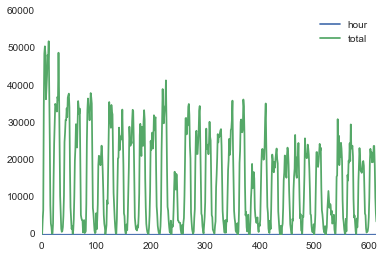

In [49]:
query="""

SELECT date,day_of_week,hour, sum(amount) total
FROM expenditure_time_curve 
where zipcode='08002'
group by date,day_of_week,hour
order by date,day_of_week,hour 


"""
time_curve= pysqldf(query)
print time_curve[:3]
time_curve.plot()
